<a href="https://colab.research.google.com/github/fahadalshahid/CSE-422-project/blob/main/24141187_Fahad_Al_Shahid_CSE422_04_Colab_Fall2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path ="/content/drive/MyDrive/My_Projects/CSE422_ML_Project/files/obesity_level main.csv"
df = pd.read_csv(file_path)


In [ ]:
df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals,SMOKE,Consumption of alcohol,transportation,Obesity_level
0,0,Male,24,1.699998,81.669950,1,1,3.0,No,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18,1.560000,57.000000,1,1,3.0,No,Never,Automobile,Normal_weight
2,2,Female,18,1.711460,50.165754,1,1,1.0,No,Never,Public_Transportation,Insufficient_Weight
3,3,Female,20,1.710730,131.274851,1,1,3.0,No,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31,1.914186,93.798055,1,1,2.0,No,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(20758, 12)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
Frequent consumption of high-caloric food,0
Number of main meals,200
SMOKE,0
Consumption of alcohol,0


In [ ]:
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20558.000000
mean,10378.50000,23.850275,1.700245,87.887768,0.819636,0.914443,2.765250
std,5992.46278,5.700743,0.087312,26.379443,0.384500,0.279716,0.722507
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,3.000000
50%,10378.50000,23.000000,1.700000,84.064875,1.000000,1.000000,3.000000
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         20758 non-null  int64  
 1   Gender                                     20758 non-null  object 
 2   Age                                        20758 non-null  int64  
 3   Height                                     20758 non-null  float64
 4   Weight                                     20758 non-null  float64
 5   family_history_with_overweight             20758 non-null  int64  
 6   Frequent consumption of high-caloric food  20758 non-null  int64  
 7   Number of main meals                       20558 non-null  float64
 8   SMOKE                                      20758 non-null  object 
 9   Consumption of alcohol                     20758 non-null  object 
 10  transportation        

**Dropping Column ID:**
ID is irrelevant here.

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals,SMOKE,Consumption of alcohol,transportation,Obesity_level
0,Male,24,1.699998,81.669950,1,1,3.0,No,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18,1.560000,57.000000,1,1,3.0,No,Never,Automobile,Normal_weight
2,Female,18,1.711460,50.165754,1,1,1.0,No,Never,Public_Transportation,Insufficient_Weight
3,Female,20,1.710730,131.274851,1,1,3.0,No,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31,1.914186,93.798055,1,1,2.0,No,Sometimes,Public_Transportation,Overweight_Level_II


# Data Exploration and Visualization

Obesity Level Distribution - Count

Obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


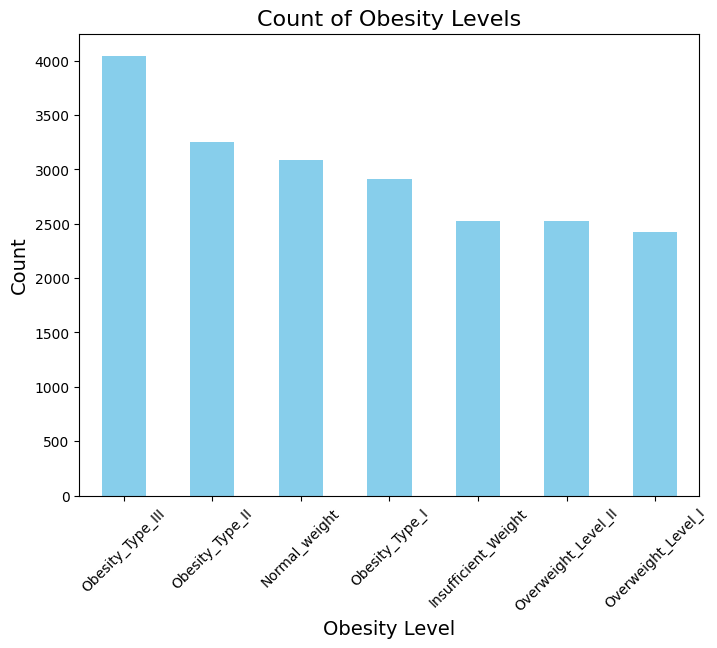

In [ ]:
obesity_level_counts = df['Obesity_level'].value_counts()

print(obesity_level_counts)

obesity_level_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Obesity Levels', fontsize=16)
plt.xlabel('Obesity Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Obesity Level Distribution - Percentage

Obesity_level
Obesity_Type_III       19.491280
Obesity_Type_II        15.646979
Normal_weight          14.847288
Obesity_Type_I         14.018692
Insufficient_Weight    12.154350
Overweight_Level_II    12.149533
Overweight_Level_I     11.691878
Name: proportion, dtype: float64


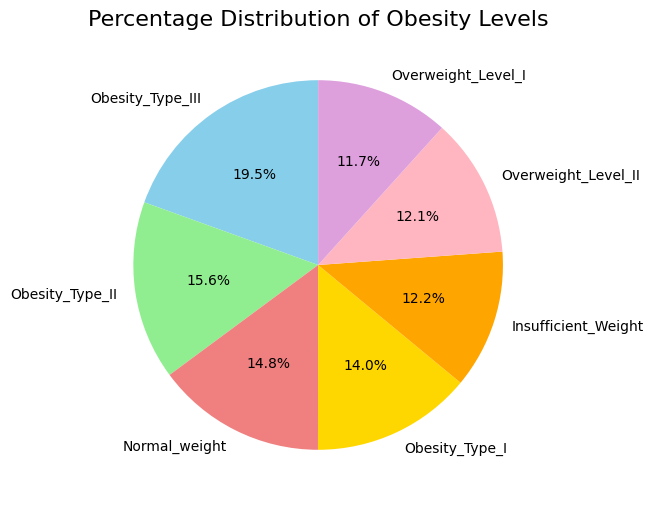

In [ ]:
obesity_level_percentage = df['Obesity_level'].value_counts(normalize=True) * 100

print(obesity_level_percentage)

plt.figure(figsize=(8, 6))
obesity_level_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange', 'lightpink', 'plum'])
plt.title('Percentage Distribution of Obesity Levels', fontsize=16)
plt.ylabel('')
plt.show()


# Data Cleaning and Preprocessing

Dropping Rows

In [ ]:
# Check how many values are missing in the Number of main meals column
print("Number of rows with null values in Number of main meals column: ", df['Number of main meals'].isnull().sum())


Number of rows with null values in Number of main meals column:  200


In [ ]:
print("Shape of orginal dataset: ", df.shape)

df_subset = df[df['Number of main meals'].notnull()]
df_main = df_subset[df_subset['transportation'].notnull()]
print("Shape after removing null values: ", df_main.shape)

Shape of orginal dataset:  (20758, 11)
Shape after removing null values:  (20533, 11)


In [ ]:
df_main.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
Frequent consumption of high-caloric food,0
Number of main meals,0
SMOKE,0
Consumption of alcohol,0
transportation,0


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20533 entries, 0 to 20709
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     20533 non-null  int64  
 1   Age                                        20533 non-null  int64  
 2   Height                                     20533 non-null  float64
 3   Weight                                     20533 non-null  float64
 4   family_history_with_overweight             20533 non-null  int64  
 5   Frequent consumption of high-caloric food  20533 non-null  int64  
 6   Number of main meals                       20533 non-null  float64
 7   SMOKE                                      20533 non-null  object 
 8   Consumption of alcohol                     20533 non-null  object 
 9   transportation                             20533 non-null  object 
 10  Obesity_level              

# Encode Categorical Variables

In [ ]:
df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

Encode Gender Column

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_main = df_main.copy()
df_main['Gender'] = label_encoder.fit_transform(df_main['Gender'])
print(df_main['Gender'].unique())

[1 0]


In [ ]:
df['Consumption of alcohol'].unique()

array(['Sometimes', 'Never', 'Frequently'], dtype=object)

In [ ]:
df_main = df_main.copy()
df_main['Consumption of alcohol'] = label_encoder.fit_transform(df_main['Consumption of alcohol'])
print(df_main['Consumption of alcohol'].unique())

[2 1 0]


In [ ]:
df['SMOKE'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_main['SMOKE'].unique()
label_encoder = LabelEncoder()
df_main = df_main.copy()
df_main['SMOKE'] = label_encoder.fit_transform(df_main['SMOKE'])
print(df_main['SMOKE'].unique())

[0 1]


In [ ]:
df['transportation'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike', nan], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df_main = df_main.copy()
df_main['transportation'] = label_encoder.fit_transform(df_main['transportation'])
print(df_main['transportation'].unique())

[3 0 4 2 1]


In [ ]:
df['Obesity_level'].unique()


array(['Overweight_Level_II', 'Normal_weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [ ]:
df_main['Obesity_level'].unique()
df_main = df_main.copy()
df_main['Obesity_level'] = label_encoder.fit_transform(df_main['Obesity_level'])
print(df_main['Obesity_level'].unique())

[6 1 0 4 3 5 2]


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20533 entries, 0 to 20709
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     20533 non-null  int64  
 1   Age                                        20533 non-null  int64  
 2   Height                                     20533 non-null  float64
 3   Weight                                     20533 non-null  float64
 4   family_history_with_overweight             20533 non-null  int64  
 5   Frequent consumption of high-caloric food  20533 non-null  int64  
 6   Number of main meals                       20533 non-null  float64
 7   SMOKE                                      20533 non-null  int64  
 8   Consumption of alcohol                     20533 non-null  int64  
 9   transportation                             20533 non-null  int64  
 10  Obesity_level              

In [ ]:
df_main.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals,SMOKE,Consumption of alcohol,transportation,Obesity_level
0,1,24,1.699998,81.669950,1,1,3.0,0,2,3,6
1,0,18,1.560000,57.000000,1,1,3.0,0,1,0,1
2,0,18,1.711460,50.165754,1,1,1.0,0,1,3,0
3,0,20,1.710730,131.274851,1,1,3.0,0,2,3,4
4,1,31,1.914186,93.798055,1,1,2.0,0,2,3,6


# Correlation Analysis

In [ ]:
correlation_matrix = df_main.corr()
correlation_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals,SMOKE,Consumption of alcohol,transportation,Obesity_level
Gender,1.000000,0.066736,0.624085,0.117563,0.095609,0.021802,0.041584,0.062499,-0.086209,-0.140485,0.045967
Age,0.066736,1.000000,-0.011871,0.284217,0.261753,0.055905,-0.047535,0.056773,0.034004,-0.604529,0.281635
Height,0.624085,-0.011871,1.000000,0.415947,0.227331,0.115797,0.192120,0.070961,0.046917,-0.050203,0.060647
Weight,0.117563,0.284217,0.415947,1.000000,0.513260,0.228656,0.095367,0.041421,0.246269,-0.009085,0.432145
family_history_with_overweight,0.095609,0.261753,0.227331,0.513260,1.000000,0.153463,0.043655,0.020492,0.014923,-0.110564,0.320547
Frequent consumption of high-caloric food,0.021802,0.055905,0.115797,0.228656,0.153463,1.000000,0.011782,-0.016800,0.116393,-0.026613,0.010690
Number of main meals,0.041584,-0.047535,0.192120,0.095367,0.043655,0.011782,1.000000,0.008489,0.096379,-0.002837,-0.085974
SMOKE,0.062499,0.056773,0.070961,0.041421,0.020492,-0.016800,0.008489,1.000000,0.013597,-0.020944,-0.000881
Consumption of alcohol,-0.086209,0.034004,0.046917,0.246269,0.014923,0.116393,0.096379,0.013597,1.000000,0.064408,0.055219
transportation,-0.140485,-0.604529,-0.050203,-0.009085,-0.110564,-0.026613,-0.002837,-0.020944,0.064408,1.000000,-0.075837


<Axes: >

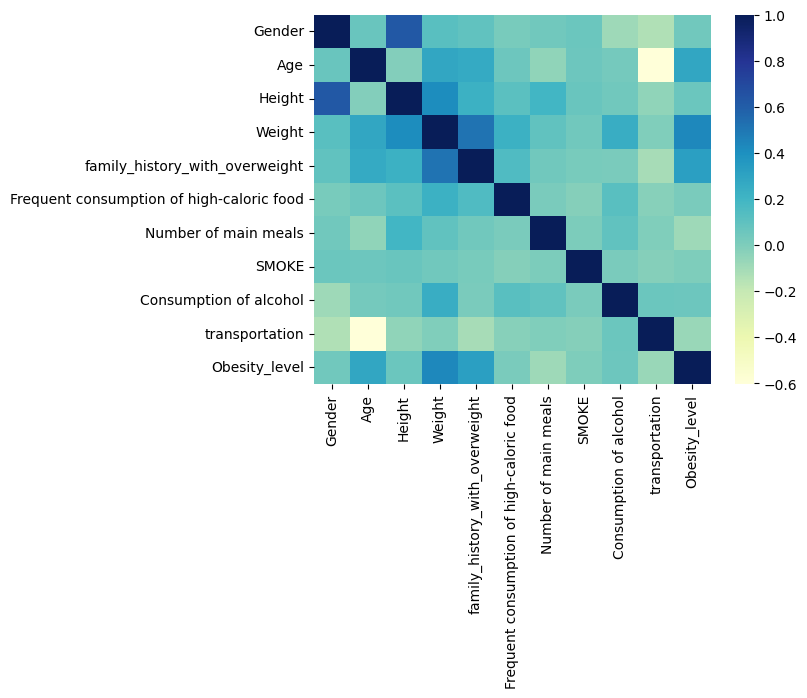

In [ ]:
import seaborn as sns

sns.heatmap(correlation_matrix, cmap = 'YlGnBu')

# Split Data into Training and Testing Sets

In [ ]:
Y=df_main["Obesity_level"] # target

In [ ]:
Y

,Obesity_level
0,6
1,1
2,0
3,4
4,6
...,...
20705,4
20706,5
20707,4
20708,6


In [ ]:
X=df_main.drop('Obesity_level',axis=1)

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high-caloric food,Number of main meals,SMOKE,Consumption of alcohol,transportation
0,1,24,1.699998,81.669950,1,1,3.0,0,2,3
1,0,18,1.560000,57.000000,1,1,3.0,0,1,0
2,0,18,1.711460,50.165754,1,1,1.0,0,1,3
3,0,20,1.710730,131.274851,1,1,3.0,0,2,3
4,1,31,1.914186,93.798055,1,1,2.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...
20705,0,26,1.673665,104.790549,1,1,3.0,0,2,3
20706,0,40,1.550000,62.631382,0,1,3.0,0,2,0
20707,0,26,1.637524,104.790549,1,1,3.0,0,2,3
20708,1,31,1.733439,82.276350,1,1,3.0,0,2,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=0)# train 70, test 30
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14373, 10)
y_train shape: (14373,)
X_test shape: (6160, 10)
y_test shape: (6160,)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
dt_ac = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", dt_ac)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8438311688311688
Confusion Matrix:
 [[ 671   64    0    1    0    8    1]
 [  92  730    6    0    0   88   20]
 [   1    4  737   49    5   28   77]
 [   0    0   51  917    0    1    8]
 [   1    0    6    0 1191    1    0]
 [   6  101   36    0    2  428   91]
 [   0   24   76   14    0  100  524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       745
           1       0.79      0.78      0.79       936
           2       0.81      0.82      0.81       901
           3       0.93      0.94      0.94       977
           4       0.99      0.99      0.99      1199
           5       0.65      0.64      0.65       664
           6       0.73      0.71      0.72       738

    accuracy                           0.84      6160
   macro avg       0.83      0.83      0.83      6160
weighted avg       0.84      0.84      0.84      6160



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
knn_ac = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", knn_ac)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8534090909090909
Confusion Matrix:
 [[ 667   76    0    1    0    1    0]
 [ 106  719    0    0    0   99   12]
 [   1    2  767   37    7   23   64]
 [   0    0   39  932    2    0    4]
 [   1    1    3    3 1191    0    0]
 [   5   73   32    0    0  467   87]
 [   0   24   98    8    0   94  514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.87       745
           1       0.80      0.77      0.79       936
           2       0.82      0.85      0.83       901
           3       0.95      0.95      0.95       977
           4       0.99      0.99      0.99      1199
           5       0.68      0.70      0.69       664
           6       0.75      0.70      0.72       738

    accuracy                           0.85      6160
   macro avg       0.84      0.84      0.84      6160
weighted avg       0.85      0.85      0.85      6160



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
lr_ac = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", lr_ac)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8501623376623376
Confusion Matrix:
 [[ 703   40    0    1    0    0    1]
 [ 107  737    0    0    0   86    6]
 [   1    1  729   77   10   19   64]
 [   0    0   52  918    0    0    7]
 [   1    0    1    0 1196    1    0]
 [   3   72   25    0    0  443  121]
 [   0    9  109    7    0  102  511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       745
           1       0.86      0.79      0.82       936
           2       0.80      0.81      0.80       901
           3       0.92      0.94      0.93       977
           4       0.99      1.00      0.99      1199
           5       0.68      0.67      0.67       664
           6       0.72      0.69      0.71       738

    accuracy                           0.85      6160
   macro avg       0.83      0.83      0.83      6160
weighted avg       0.85      0.85      0.85      6160



# Model Comparison

Accuracy Test

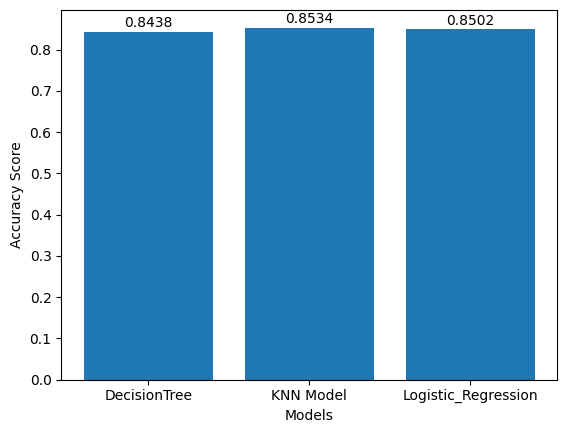

In [ ]:
accuracy=[dt_ac,knn_ac,lr_ac]
plt.bar(x=['DecisionTree','KNN Model','Logistic_Regression'],height=accuracy)
plt.xlabel("Models")

plt.ylabel("Accuracy Score")
for i in range(len(accuracy)):
   plt.text(i, accuracy[i]+.01, f'{accuracy[i]:.4f}', ha='center')
plt.show()